# CS198: Introduction to Deep Learning  
*Based on Lectures 2 and 3 from the CS198 UCB course by Machine Learning at Berkeley.*

## What is Deep Learning?
**Deep Learning** is a subfield of Machine Learning that leverages **artificial neural networks** with multiple layers (hence “deep”). 

These layered networks can learn **hierarchical representations** of data, enabling powerful solutions in computer vision, natural language processing, speech recognition, and beyond.

In contrast to traditional ML algorithms that rely heavily on **hand-crafted features**, deep learning automatically discovers intricate feature representations, often outperforming other methods given enough data and computational power.


## Why Deep Learning?
1. **Automatic Feature Extraction**: Deep networks learn feature representations directly from raw inputs (e.g., pixels in an image).
2. **Expressive Models**: Multiple layers enable the network to represent complex functions and patterns.
3. **State-of-the-Art Results**: Deep learning drives advances in tasks like `image classification`, `object detection`, `natural language understanding`, and `generative modeling`.
4. **Rich Ecosystem**: Open-source libraries (`PyTorch`, `TensorFlow`, `Keras`) and high-performance hardware (`GPUs`, `TPUs`) make deep learning more accessible than ever.
   
    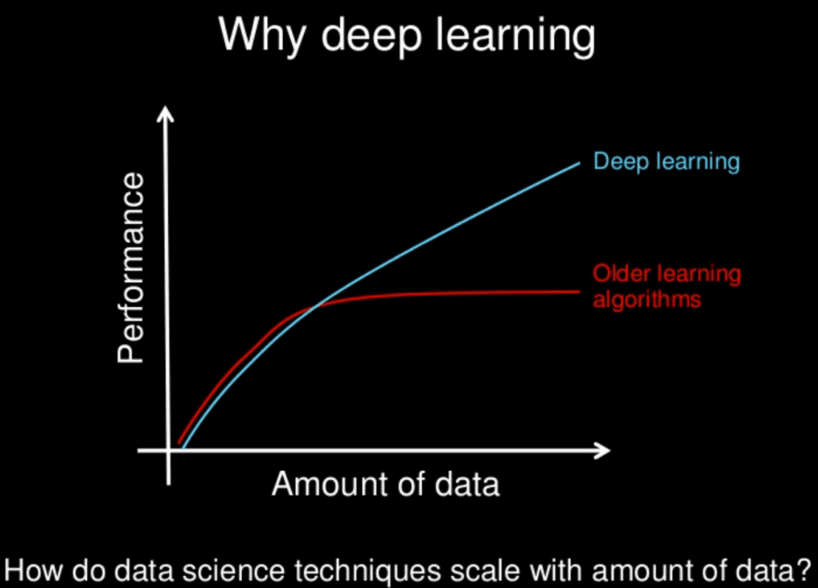


## Neural Network Foundations

### Biological Inspiration
Neural networks are loosely inspired by the **structure of the brain**, which is composed of interconnected neurons. Each biological neuron:
- Receives inputs (electrical signals) via dendrites,
- Processes them in the cell body,
- Produces an output signal along an axon to other neurons.

While modern deep learning is not a perfect replication of the human brain, this analogy motivates the concept of **interconnected layers** of simple computational units (neurons) that collectively learn complex patterns.

### Artificial Neurons
An **artificial neuron** (or node) computes a weighted sum of its inputs and then applies a nonlinear function. Mathematically:

$$
z = w_1 x_1 + w_2 x_2 + \dots + w_n x_n + b \quad \rightarrow \quad a = \sigma(z)
$$

Where:
- $x_i$ are inputs,
- $ w_i $ are weights,
- $ b $ is a bias term,
- $\sigma(\cdot)$ is an **activation function** that introduces nonlinearity (e.g., ReLU, sigmoid).

## From Single-Layer to Multi-Layer Networks

### Perceptron
- **History**: The perceptron is one of the earliest neural network models (late 1950s).  
- **Structure**: A single-layer network that applies a linear function to inputs and then a step activation (for classification).  
- **Limitation**: A single perceptron can only learn **linearly separable** boundaries, limiting its representational power.

    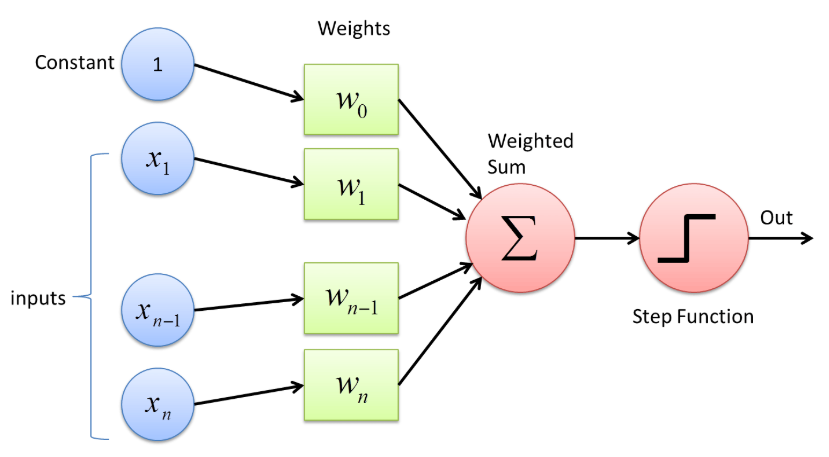

$$
f(\bar x,\bar w, b) = ReLU(\bar w ^{T} \bar x +b)
$$

### Multi-Layer Perceptron (MLP)
To overcome the limitations of the single-layer perceptron, we stack multiple layers of artificial neurons. 

This stacked architecture—often called a **multi-layer perceptron** (MLP)—enables the network to learn **non-linear decision boundaries** and more sophisticated representations.

- **Hidden Layers**: Layers between input and output that transform inputs into increasingly abstract representations.
- **Depth**: The number of layers in a network. More layers = higher capacity, but also more computational cost.

    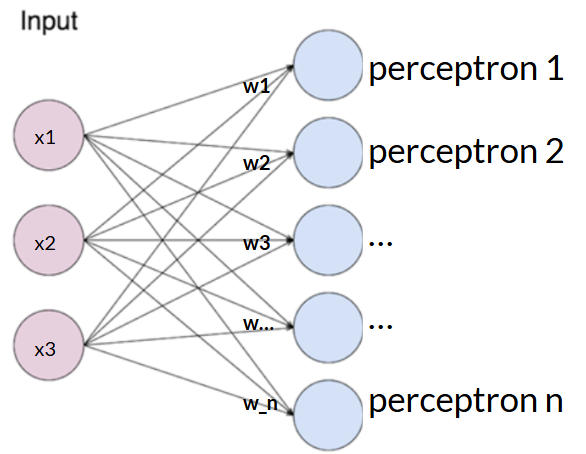

    $$
    f\bigl(\mathbf{x},\, \mathbf{w}_1,\mathbf{w}_2,\dots,\mathbf{w}_n,\; b_1,b_2,\dots,b_n\bigr)
    \;=\;
    \mathrm{ReLU}\!\Biggl(
    \begin{bmatrix}
    \mathbf{w}_1^\mathsf{T}\mathbf{x} + b_1\\[6pt]
    \mathbf{w}_2^\mathsf{T}\mathbf{x} + b_2\\[6pt]
    \vdots\\[2pt]
    \mathbf{w}_n^\mathsf{T}\mathbf{x} + b_n
    \end{bmatrix}
    \Biggr).
    $$

- Example: Calculate the value 
  
    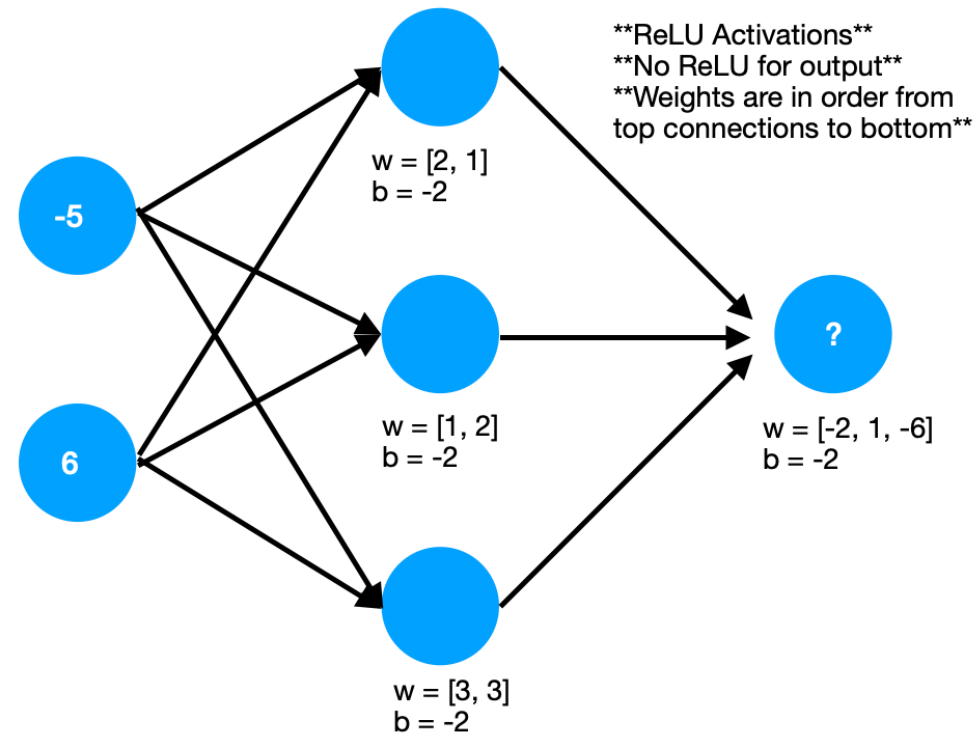


### Activation Functions
Nonlinear **activation functions** allow these networks to learn complex, non-linear patterns. Common activations include:
- **Sigmoid**: $\sigma(z) = \frac{1}{1 + e^{-z}}$. Historically popular but can cause **vanishing gradients** when $z$ is large in magnitude.
  - This is also known as the `logistic function` and spits out values between `(0, 1)`
  
  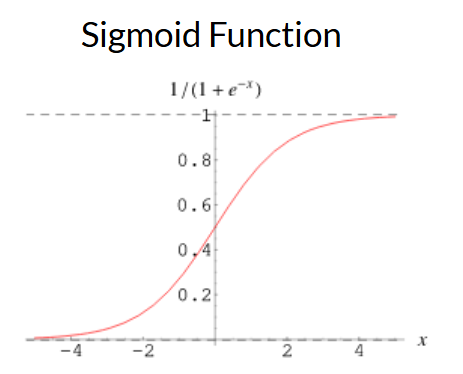

- **Tanh**: $\tanh(z) = \frac{e^{z} - e^{-z}}{e^{z} + e^{-z}}$. Similar issues with **vanishing gradients**, but **zero-centered output**.
- **ReLU**: $\max(0, z)$. Faster convergence in practice, widely used in modern deep networks.
- **Leaky ReLU** / **Parametric ReLU**: Variants of ReLU that allow small negative outputs to mitigate the “dying ReLU” problem.
  -  Values less than zero we have a super small slope instead of slope zero

    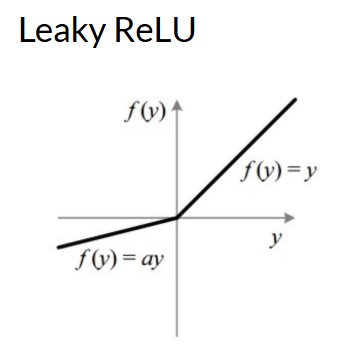

## Forward Propagation and the Computation Graph
**Forward propagation** (or forward pass) is how data “flows” through the network:
1. Start with input data (e.g., an image’s pixels).
2. Multiply by weights and add biases in each layer.
3. Apply an activation function.
4. Pass the output of one layer as the input to the next layer.
5. Produce the final prediction (e.g., class probabilities).

In modern deep learning frameworks, the **computation graph** tracks these operations, allowing automatic differentiation (backprop) for training.

## Backward Propagation (Backprop)
**Backpropagation** is the algorithm used to compute the gradient of the loss function with respect to each weight in the network:
1. **Loss Function**: Measures how far off the network’s predictions are from the target labels (in supervised learning). Examples include:
   - Mean Squared Error (MSE)
   - Cross-Entropy Loss
2. **Compute Gradients**: Using the chain rule, backpropagation calculates how each weight contributed to the final error.
3. **Update Weights**: Weights are adjusted (e.g., via gradient descent) to reduce the loss.

### Gradient Descent and Variants

   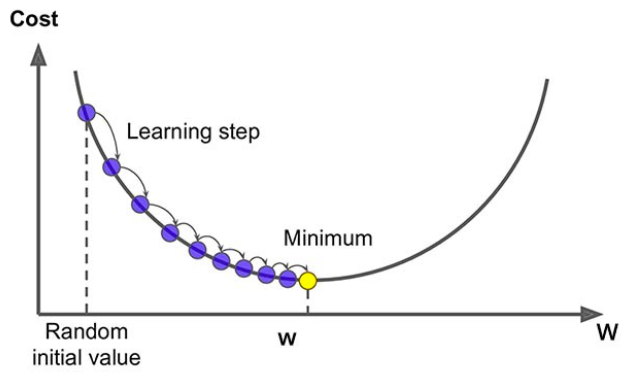

- **Batch Gradient Descent**: Uses all training samples to compute the gradient in a single step. Computationally expensive for large datasets.
$$
\bar{\theta}_i \;\to\; \bar{\theta}_i 
\;-\;
\lambda\, \frac{1}{\mathrm{len}(\text{batch})}
\sum_{\text{batch}}
\left.
\frac{\partial L}{\partial \bar{\theta}_i}
\right\rvert_{(\bar{\theta},\, \mathrm{data}_j)}
$$

- **Stochastic Gradient Descent (SGD)**: Updates parameters using one sample (or a small batch) at a time. Faster per update, but noisier gradients.
- **Mini-Batch Gradient Descent**: The most common approach—updates using a small subset (batch) of the training set, balancing efficiency and stability.
- **Advanced Optimizers**:  
  - **Adam**: Combines momentum (accumulating moving averages of gradients) with adaptive learning rates.
  - **RMSProp**: Similar to Adam but focuses on the moving average of recent gradients.

### Loss Functions
The choice of **loss function** depends on the task:
- **Classification**: Cross-Entropy (a.k.a. log loss) is standard for multi-class problems.
- **Regression**: Mean Squared Error (MSE) or Mean Absolute Error (MAE).


## Practical Training Considerations

### Initialization
Properly setting the initial weights can prevent training issues:
- **Random Initialization**: Weights are sampled from a distribution (e.g., Gaussian).
- **He / Xavier Initialization**: Adjusts variance based on layer size to maintain stable signal flow.

### Regularization in Deep Learning
Deep neural networks have a large number of parameters and can **overfit** if not managed carefully. Common regularization techniques:
- **$L_1$ or $L_2$ Penalties**: Penalties on large weight values.
- **Dropout**: Randomly “dropping” a fraction of neurons during training to prevent co-adaptation.
- **Data Augmentation**: Increasing effective training set size by perturbing inputs (e.g., flipping, rotating images).

### Hyperparameter Tuning
Training deep networks involves choosing many hyperparameters:
- **Learning Rate**: Most critical hyperparameter. Too high → diverge, too low → slow training.
- **Batch Size**: Larger batches lead to smoother gradient estimates, but require more memory.
- **Number of Layers / Neurons**: Depth and width of the network.
- **Regularization Strength** (dropout rate, weight decay, etc.).
- **Number of Epochs** (complete passes over the data).

Systematic tuning (grid search, random search, Bayesian optimization) can be helpful; however, domain knowledge and practical experience often guide these choices.

---

## Common Deep Learning Architectures

### Fully Connected Networks (MLP)
- **Structure**: Sequential layers where every neuron in one layer is connected to every neuron in the next.
- **Usage**: Often used for tabular data or simpler classification/regression tasks.
- **Limitation**: Scales poorly for high-dimensional inputs like large images.

### Convolutional Neural Networks (CNNs)
- **Key Idea**: Convolution operations exploit local spatial structure (e.g., neighboring pixels in an image).
- **Applications**: Image classification, object detection, image segmentation.
- **Architectures**: Common examples include LeNet, AlexNet, VGG, ResNet, etc.

### Recurrent Neural Networks (RNNs)
- **Key Idea**: Models sequential data by maintaining hidden states that carry “memory” through time steps.
- **Applications**: Language modeling, machine translation, time-series forecasting.
- **Variants**: LSTM (Long Short-Term Memory) and GRU (Gated Recurrent Unit) networks address the vanishing gradient problem in vanilla RNNs.

*(Lectures 2 and 3 typically provide a foundational overview rather than deep diving into each architecture, but these are the core building blocks in modern deep learning.)*

---

## Tools and Frameworks
Modern deep learning is powered by highly optimized libraries, often leveraging GPU acceleration:
- **TensorFlow** (Google): Large community, powerful ecosystem, including Keras for high-level APIs.
- **PyTorch** (Meta / Facebook): Dynamic computation graph, widely adopted in research.
- **JAX** (Google): Functional approach, auto-vectorization, popular in some research areas.
- **ONNX**: An interchange format for moving models between frameworks.

---

## Summary
Over **Lectures 2 and 3**, we built upon the foundations of machine learning to explore **deep learning**:
- **Neural Network Basics**: Artificial neurons, multi-layer architectures, activation functions.
- **Forward Pass** and **Computation Graph**: How data and gradients flow through the network.
- **Backpropagation** and **Optimization**: The chain rule under the hood and common optimizers (SGD, Adam).
- **Regularization and Hyperparameter Tuning**: Preventing overfitting in large networks and fine-tuning model performance.
- **Common Architectures**: Fully connected networks, CNNs, RNNs, and their typical use cases.

Deep learning is a rapidly evolving field. Mastery involves balancing **theory** (understanding neural network math and optimization) with **practice** (implementing real-world projects, tuning hyperparameters, and debugging training issues).

---

## Further Reading & Resources
- **[CS198: Machine Learning at Berkeley YouTube Playlist](https://www.youtube.com/watch?v=Q3fqoJ41g6U&list=PLzWRmD0Vi2KVsrCqA4VnztE4t71KnTnP5)**  
  - Lecture 2 & 3 video recordings for more detailed explanations, code examples, and Q&A.
- **[Deep Learning Book by Goodfellow, Bengio, and Courville](https://www.deeplearningbook.org/)**  
  - A comprehensive textbook on the theory of deep learning.
- **[PyTorch Tutorials](https://pytorch.org/tutorials/)**  
  - Beginner to advanced tutorials for building neural nets, CNNs, RNNs, etc.
- **[TensorFlow/Keras Guides](https://www.tensorflow.org/guide)**  
  - Official Google documentation for building deep learning models.
- **Stanford’s [CS231n](http://cs231n.stanford.edu/)** (CNNs for Visual Recognition) and [CS224n](http://web.stanford.edu/class/cs224n/)** (Natural Language Processing with Deep Learning).  

---

> **Disclaimer**: This tutorial is a summary and adaptation of the concepts presented in Lectures 2 & 3 of CS198 UCB (Machine Learning at Berkeley). For the most accurate and detailed information, please refer to the official course materials and videos.
